![alt text](Task_3.png)

▶*TASK-3 : CUSTOMER CHURN PREDICTION*

> Author: Hamesh Raj

> Batch: April

> Domain: Machine Learning

*Step 1: Import necessary libraries*

In [245]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

*Task2: Load the dataset*

In [246]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


*Task3: Data Preprocessing and cleaning*

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [248]:
df.shape

(10000, 14)

In [249]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [250]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [251]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [252]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# changing categorical values to numerical values

In [253]:
df = pd.get_dummies(df, columns=['Gender', 'Geography'], dtype=int)

df.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,0,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1,1,0,0
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1,1,0,0
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1,1,0,0


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Gender_Female      10000 non-null  int32  
 10  Gender_Male        10000 non-null  int32  
 11  Geography_France   10000 non-null  int32  
 12  Geography_Germany  10000 non-null  int32  
 13  Geography_Spain    10000 non-null  int32  
dtypes: float64(2), int32(5), int64(7)
memory usage: 898.6 KB


# Data visualization

In [255]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

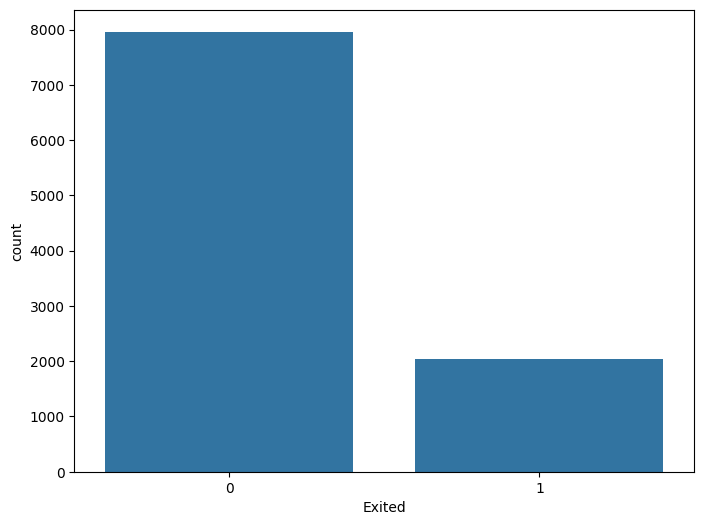

In [256]:
plt.figure(figsize =(8,6))
sns.countplot(x='Exited',data = df)

Note: We can see the data imbalance in exited columns. We have to downsample

In [257]:
from sklearn.utils import resample

majority=df[df['Exited']==0]
minority=df[df['Exited']==1]

In [258]:
majority.shape, minority.shape

((7963, 14), (2037, 14))

In [259]:
majority_downsample=resample(majority,n_samples=2037,replace=False,random_state=23)

In [260]:
majority_downsample.shape

(2037, 14)

In [261]:
df=pd.concat([majority_downsample, minority])

In [262]:
df['Exited'].value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

<Axes: >

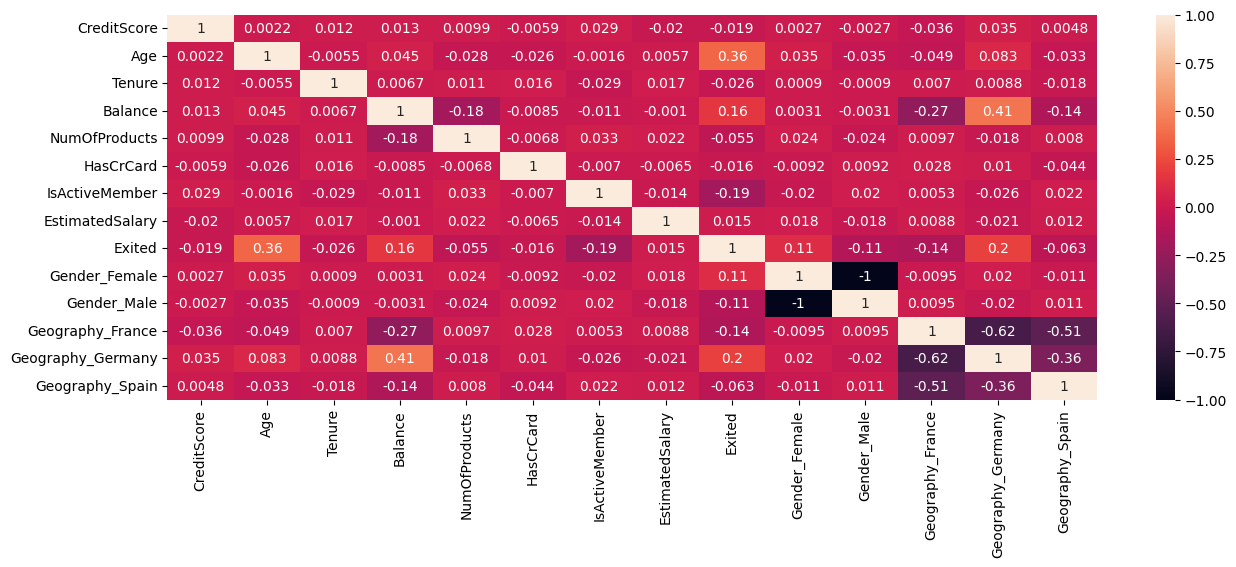

In [263]:
# Plotting the heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

In [264]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [265]:
#remove unwanted columns again
df = df.drop(['Gender_Female', 'Gender_Male', 'Geography_France', 'Geography_Germany', 'Geography_Spain'],axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8643,754,40,2,160625.17,1,0,1,3554.63,0
2263,757,49,2,0.00,2,0,0,164482.92,0
9147,636,35,9,95478.17,1,0,0,169286.74,0
7128,553,38,1,181110.13,2,1,0,184544.59,0
5384,727,28,1,0.00,1,1,0,40357.39,0


## Splitting the dataset

In [266]:
X=df.drop(columns=['Exited'])
y=df['Exited']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=34)

In [267]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3259, 8), (3259,), (815, 8), (815,))

In [268]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

## Model Creation and evaluation

#### 1. Logistic Regression

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
lr=LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)

print(f'Accuracy : {accuracy_score(y_pred_lr,y_test)}')

Accuracy : 0.6748466257668712


              precision    recall  f1-score   support

           0       0.69      0.67      0.68       416
           1       0.66      0.68      0.67       399

    accuracy                           0.67       815
   macro avg       0.67      0.68      0.67       815
weighted avg       0.68      0.67      0.67       815



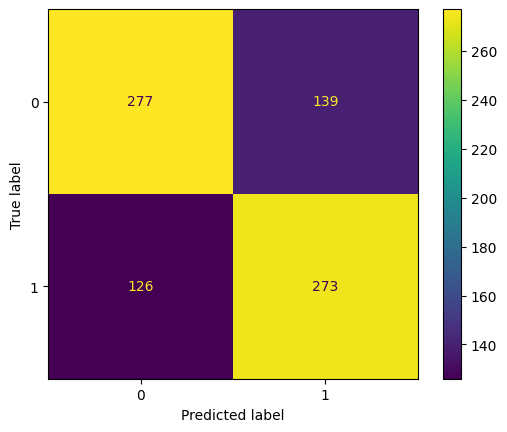

In [270]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
lr_cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_lr,labels=lr.classes_),display_labels=lr.classes_)
lr_cmd.plot()

print(classification_report(y_test,y_pred_lr))

#### 2. Random Forest Classifier

In [271]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print(f'Accuracy : {accuracy_score(y_pred_rf,y_test)}')

Accuracy : 0.7521472392638037


              precision    recall  f1-score   support

           0       0.75      0.77      0.76       416
           1       0.75      0.73      0.74       399

    accuracy                           0.75       815
   macro avg       0.75      0.75      0.75       815
weighted avg       0.75      0.75      0.75       815



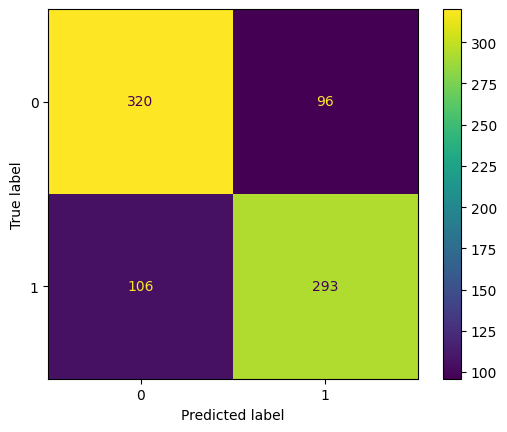

In [272]:
rf_cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_rf,labels=rf.classes_),display_labels=rf.classes_)
rf_cmd.plot()
print(classification_report(y_test,y_pred_rf))

#### 3. Gradient Boosting Classifier

In [273]:
gbf=GradientBoostingClassifier()
gbf.fit(X_train,y_train)
y_pred_gbf=gbf.predict(X_test)

print(f'Accuracy : {accuracy_score(y_pred_gbf,y_test)}')

Accuracy : 0.7644171779141105


              precision    recall  f1-score   support

           0       0.76      0.78      0.77       416
           1       0.77      0.74      0.76       399

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.76       815
weighted avg       0.76      0.76      0.76       815



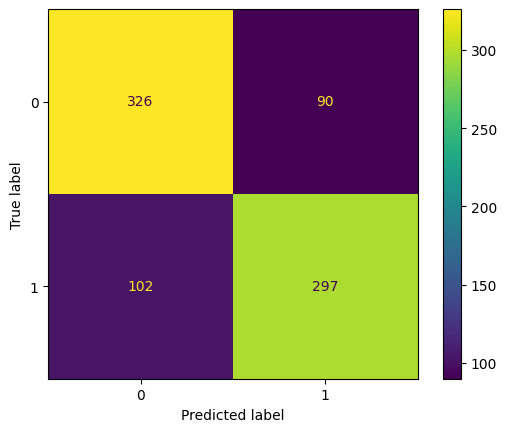

In [274]:
gbf_cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_gbf,labels=gbf.classes_),display_labels=gbf.classes_)
gbf_cmd.plot()

print(classification_report(y_test,y_pred_gbf))

#### 4. Ada Boost Classifier

In [275]:
ac=AdaBoostClassifier()
ac.fit(X_train,y_train)
y_pred_ac=ac.predict(X_test)

print(f'Accuracy : {accuracy_score(y_pred_ac,y_test)}')

Accuracy : 0.7386503067484662


              precision    recall  f1-score   support

           0       0.74      0.74      0.74       416
           1       0.73      0.73      0.73       399

    accuracy                           0.74       815
   macro avg       0.74      0.74      0.74       815
weighted avg       0.74      0.74      0.74       815



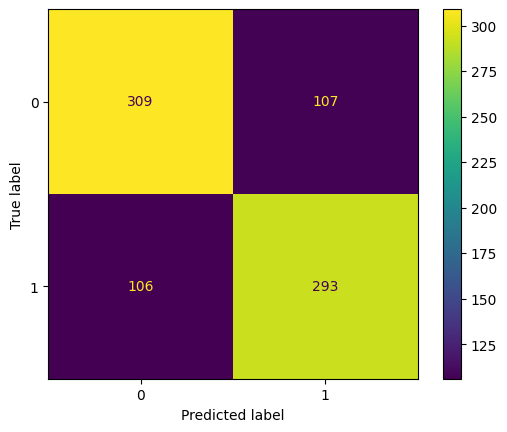

In [276]:
ac_cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_ac,labels=ac.classes_),display_labels=ac.classes_)
ac_cmd.plot()

print(classification_report(y_test,y_pred_ac))

#### 5. Xgboost classifier

In [277]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)
print(f'Accuracy : {accuracy_score(y_pred_xgb,y_test)}')

Accuracy : 0.7276073619631902


              precision    recall  f1-score   support

           0       0.73      0.73      0.73       416
           1       0.72      0.72      0.72       399

    accuracy                           0.73       815
   macro avg       0.73      0.73      0.73       815
weighted avg       0.73      0.73      0.73       815



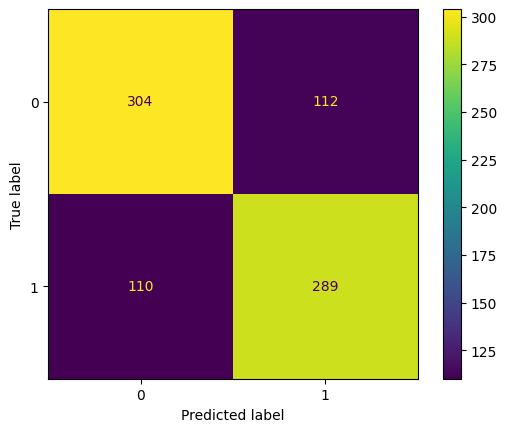

In [278]:
xgb_cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_xgb,labels=xgb.classes_),display_labels=xgb.classes_)
xgb_cmd.plot()

print(classification_report(y_test,y_pred_xgb))